In [16]:
#%%
from ts2vg import NaturalVG
from ts2vg import HorizontalVG 
# import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import networkx as nx
# import graph_tool as gt

import matplotlib.pyplot as plt
g = os.walk('PROJECT3')

total = []
total_info = []
for dirnum, (subdir, dirs, files) in enumerate(g):
    for file in files:
        subject = None
        name=""
        if len(subdir.split("\\")) > 5:   
            subject = subdir.split("\\")[5]
            
            if file.endswith("_chest.csv"):
                name+=subject+"_"+file.split("_")[1]+".png"   
                data = pd.read_csv(subdir+"/"+file)

                attr_x_g = NaturalVG(directed=None).build(data['attr_x'].values[1000:2024])
                attr_y_g = NaturalVG(directed=None).build(data['attr_y'].values[1000:2024])
                attr_z_g = NaturalVG(directed=None).build(data['attr_z'].values[1000:2024])
              

                attr_x_nxg = attr_x_g.as_networkx()
                attr_y_nxg = attr_y_g.as_networkx()
                attr_z_nxg = attr_z_g.as_networkx()
                temp = []
                temp_info = []
                temp.extend([subject,file,"NVG",attr_x_g,attr_y_g,attr_z_g])
                
                
                average_degree_x = sum(dict(attr_x_nxg.degree()).values() )/float(len(attr_x_nxg))
                network_diameter_x = nx.diameter(attr_x_nxg)
                average_path_length_x = nx.average_shortest_path_length(attr_x_nxg)
                
                average_degree_y = sum(dict(attr_y_nxg.degree()).values() )/float(len(attr_y_nxg))
                network_diameter_y = nx.diameter(attr_y_nxg)
                average_path_length_y = nx.average_shortest_path_length(attr_x_nxg)
                
                average_degree_z = sum(dict(attr_z_nxg.degree()).values() )/float(len(attr_z_nxg))
                network_diameter_z = nx.diameter(attr_z_nxg)
                average_path_length_z = nx.average_shortest_path_length(attr_z_nxg)
                
                total_info.append(["NVG",subject,"x",average_degree_x,network_diameter_x,average_path_length_x,file.split("_")[1]])
                total_info.append(["NVG",subject,"y",average_degree_y,network_diameter_y,average_path_length_y,file.split("_")[1]])
                total_info.append(["NVG",subject,"z",average_degree_z,network_diameter_z,average_path_length_z,file.split("_")[1]])
                
                
                
                
                attr_x_g = HorizontalVG(directed=None).build(data['attr_x'].values[1000:2024])
                attr_y_g = HorizontalVG(directed=None).build(data['attr_y'].values[1000:2024])
                attr_z_g = HorizontalVG(directed=None).build(data['attr_z'].values[1000:2024])
                temp_info = []
                average_degree_x = sum(dict(attr_x_nxg.degree()).values() )/float(len(attr_x_nxg))
                network_diameter_x = nx.diameter(attr_x_nxg)
                average_path_length_x = nx.average_shortest_path_length(attr_x_nxg)
                
                average_degree_y = sum(dict(attr_y_nxg.degree()).values() )/float(len(attr_y_nxg))
                network_diameter_y = nx.diameter(attr_y_nxg)
                average_path_length_y = nx.average_shortest_path_length(attr_x_nxg)
                
                average_degree_z = sum(dict(attr_z_nxg.degree()).values() )/float(len(attr_z_nxg))
                network_diameter_z = nx.diameter(attr_z_nxg)
                average_path_length_z = nx.average_shortest_path_length(attr_z_nxg)
                
            
                
                total_info.append(["HVG",subject,"x",average_degree_x,network_diameter_x,average_path_length_x,file.split("_")[1]])
                total_info.append(["HVG",subject,"y",average_degree_y,network_diameter_y,average_path_length_y,file.split("_")[1]])
                total_info.append(["HVG",subject,"z",average_degree_z,network_diameter_z,average_path_length_z,file.split("_")[1]])
                # nx.draw(attr_x_nxg,node_size=1)
             

data = pd.DataFrame(total_info,columns=["Method","Subject","AcceleroMeterAxis","AverageDegree","NetworkDiameter","AveragePathLength","Activity"])



In [17]:
data.head(10)

,Method,Subject,AcceleroMeterAxis,AverageDegree,NetworkDiameter,AveragePathLength,Activity
0,NVG,1,x,15.609375,16,6.598815,climbingdown
1,NVG,1,y,14.087891,10,6.598815,climbingdown
2,NVG,1,z,9.562500,9,4.428011,climbingdown
3,HVG,1,x,15.609375,16,6.598815,climbingdown
4,HVG,1,y,14.087891,10,6.598815,climbingdown
5,HVG,1,z,9.562500,9,4.428011,climbingdown
6,NVG,1,x,15.376953,7,3.882824,climbingup
7,NVG,1,y,16.328125,11,3.882824,climbingup
8,NVG,1,z,9.957031,10,4.634183,climbingup
9,HVG,1,x,15.376953,7,3.882824,climbingup


In [ ]:
# Task 1 output table above

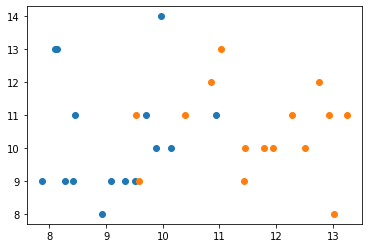

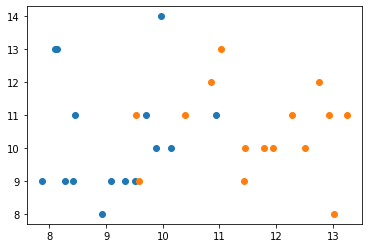

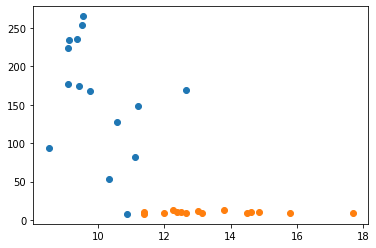

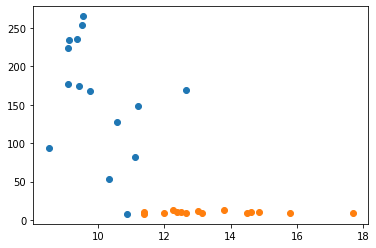

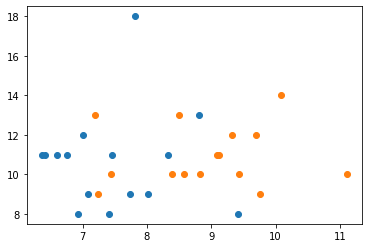

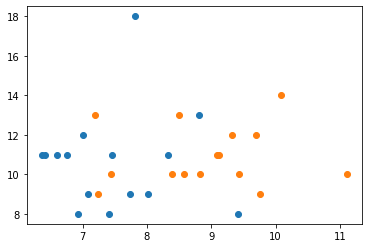

In [18]:
for AcceleroMeterAxis in ['x','y','z']:
    for Method in ['NVG','HVG']:
        groups = data[(data["AcceleroMeterAxis"]==AcceleroMeterAxis)&(data["Method"]==Method)].groupby("Activity")
        for name, group in groups:
            if name == "walking" or name == "running":
                plt.plot(group["AverageDegree"], group["NetworkDiameter"], marker="o", linestyle="", label=name)
        plt.show()



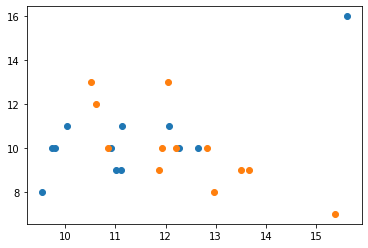

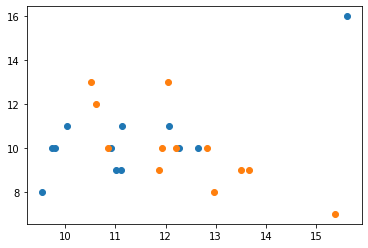

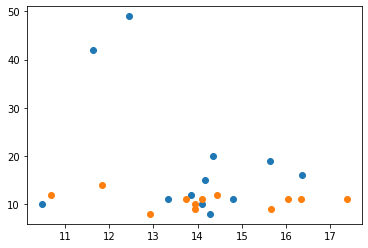

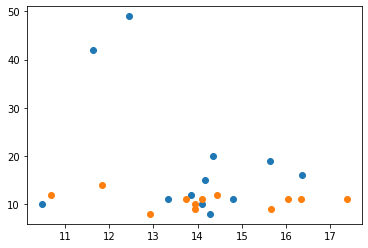

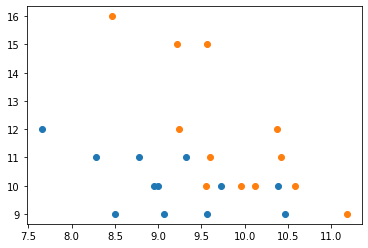

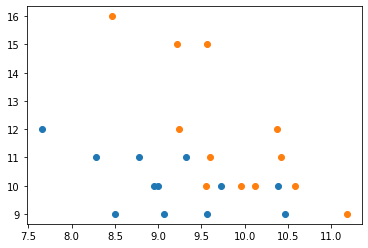

In [19]:
for AcceleroMeterAxis in ['x','y','z']:
    for Method in ['NVG','HVG']:
        groups = data[(data["AcceleroMeterAxis"]==AcceleroMeterAxis)&(data["Method"]==Method)].groupby("Activity")
        for name, group in groups:
            if name == "climbingup" or name == "climbingdown":
                plt.plot(group["AverageDegree"], group["NetworkDiameter"], marker="o", linestyle="", label=name)
        plt.show()



In [ ]:
# Average degree vs Network diameter scatter plots above

In [20]:
# -*- coding: utf-8 -*-
import ordpy
import os
import pandas as pd

g = os.walk('PROJECT3')

total = []
total_info = []
for dirnum, (subdir, dirs, files) in enumerate(g):
    for file in files:
        subject = None
        name=""
        if len(subdir.split("\\")) > 5:   
            subject = subdir.split("\\")[5]
            # print(name)
            if file.endswith("_chest.csv"):
                temp = []
                data = pd.read_csv(subdir+"/"+file)
                name=subject+"_"
                for v in ['attr_x','attr_y','attr_z']:
                    for x in [1024,2048,4096]:
                        for y in [3,4,5,6]:
                            for z in [1,2,3]:
                                temp = []
                                permutation_entropy,complexity = ordpy.complexity_entropy(data[v].values[:x],dx=y,taux=z)
                                temp.extend([subject,v.split("_")[1],x,y,z,permutation_entropy,complexity,file.split("_")[1]])
                                total.append(temp)
                                
    





In [21]:
import matplotlib.pyplot as plt
import numpy as np
data2 = pd.DataFrame(total,columns=["Subject","AcceleroMeterAxis","SignalLength","Dimension","Delay","PermutationEntropy","Complexity","Activity"])
data2.head(10)

,Subject,AcceleroMeterAxis,SignalLength,Dimension,Delay,PermutationEntropy,Complexity,Activity
0,1,x,1024,3,1,0.865585,0.112619,climbingdown
1,1,x,1024,3,2,0.960464,0.036433,climbingdown
2,1,x,1024,3,3,0.985454,0.013861,climbingdown
3,1,x,1024,4,1,0.808446,0.187779,climbingdown
4,1,x,1024,4,2,0.937031,0.073560,climbingdown
5,1,x,1024,4,3,0.975852,0.030359,climbingdown
6,1,x,1024,5,1,0.770733,0.269894,climbingdown
7,1,x,1024,5,2,0.911491,0.134825,climbingdown
8,1,x,1024,5,3,0.960151,0.068326,climbingdown
9,1,x,1024,6,1,0.724295,0.390448,climbingdown


In [ ]:
#Task 2 output table above

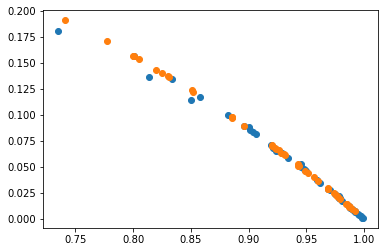

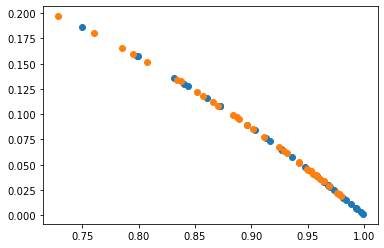

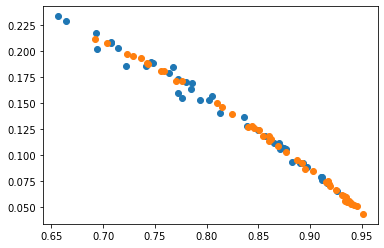

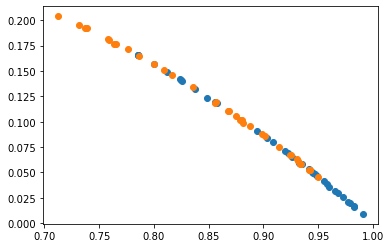

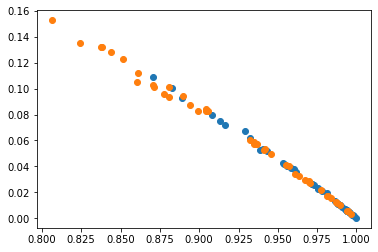

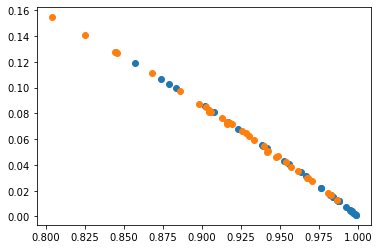

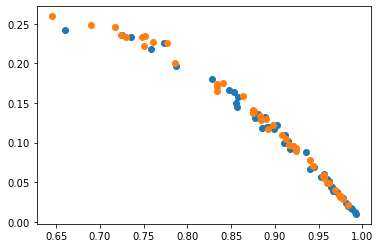

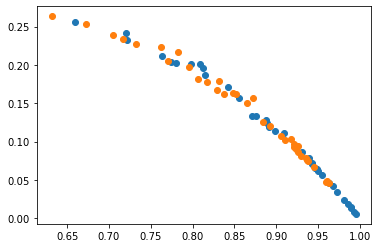

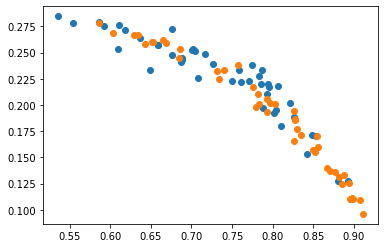

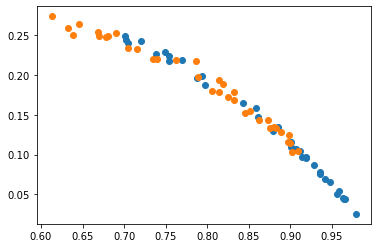

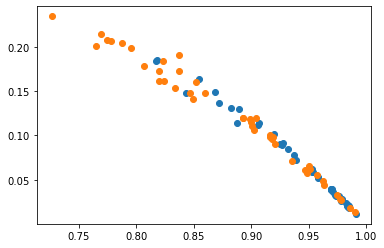

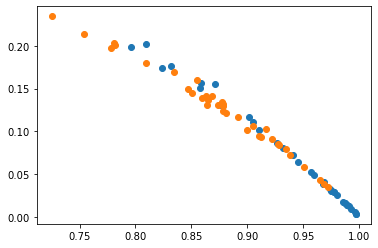

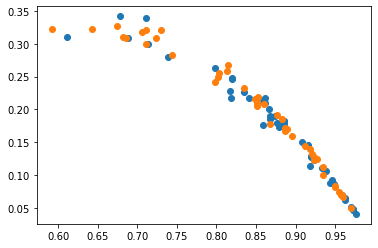

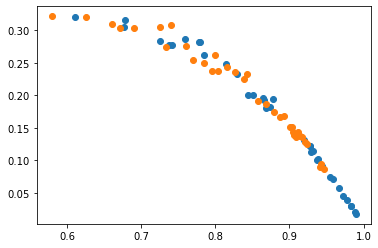

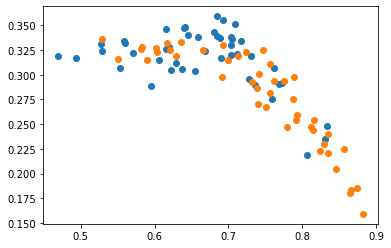

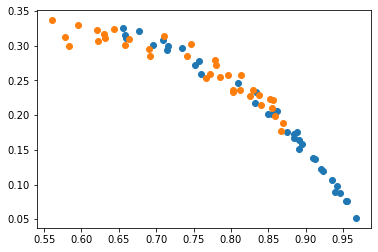

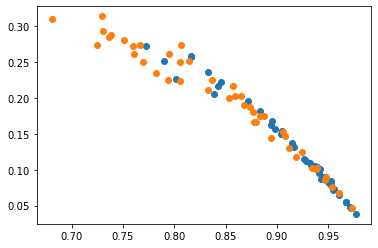

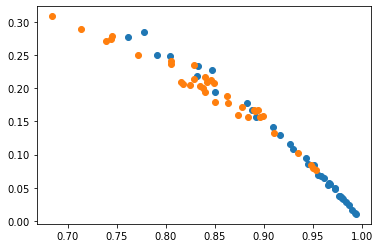

In [23]:


for dimension in [3,4,5]:
    for AcceleroMeterAxis in ["x","y","z"]:
        data_part = data2[(data2['Dimension'] ==dimension) & (data2["SignalLength"]==4096) & (data2['AcceleroMeterAxis']==AcceleroMeterAxis)]
        groups = data_part.groupby("Activity")
        for name, group in groups:
            if name == "walking" or name == "running":
                plt.plot(group["PermutationEntropy"], group["Complexity"], marker="o", linestyle="", label=name)
        plt.show()
        
        
        
        for name, group in groups:
            if name == "climbingup" or name == "climbingdown":
                plt.plot(group["PermutationEntropy"], group["Complexity"], marker="o", linestyle="", label=name)
        plt.show()
        


In [ ]:
# Permutation entropy vs Complexity scatter plots above